# Explore here

In [41]:
# Your code here
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.datasets import fetch_california_housing
from pickle import dump
import xgboost as xgb

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1.EDA

In [42]:
df.shape

(768, 9)

In [43]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [44]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.drop(columns=[])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df.isnull().any(axis=0)

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


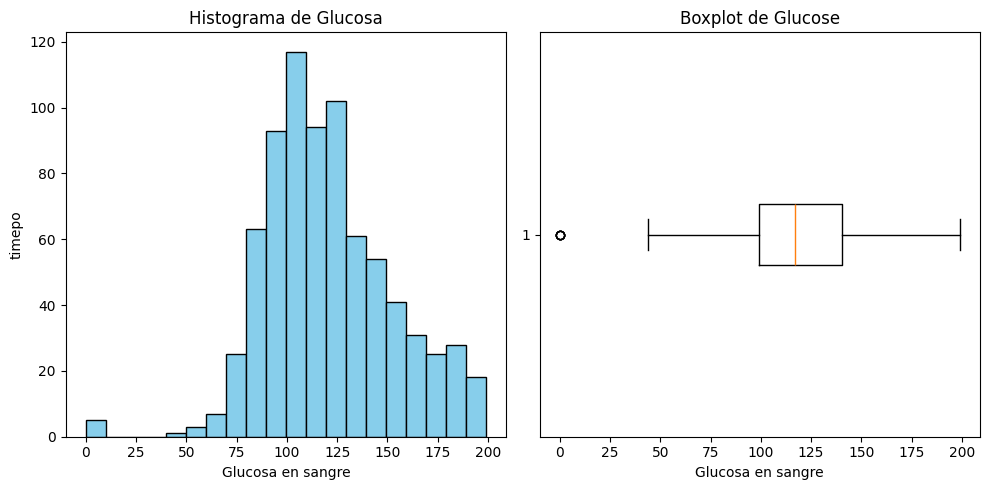

In [50]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['Glucose'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de Glucosa')
ax[0].set_xlabel('Glucosa en sangre')
ax[0].set_ylabel('timepo')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['Glucose'], vert=False)
ax[1].set_title('Boxplot de Glucose')
ax[1].set_xlabel('Glucosa en sangre')

# Mostrar la figura
plt.tight_layout()
plt.show()

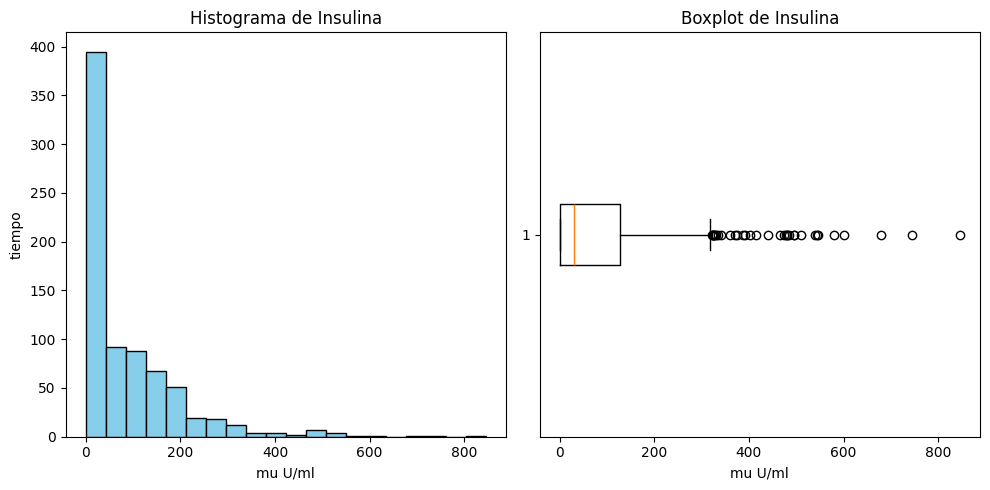

In [51]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['Insulin'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de Insulina')
ax[0].set_xlabel('mu U/ml')
ax[0].set_ylabel('tiempo')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['Insulin'], vert=False)
ax[1].set_title('Boxplot de Insulina')
ax[1].set_xlabel('mu U/ml')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [52]:
# Incidencia de los valores perdidos en cada una de las variables.
df.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [53]:
df.drop(columns=['SkinThickness', 'Age'], inplace=True)


In [54]:
df 

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,0,33.6,0.627,1
1,1,85,66,0,26.6,0.351,0
2,8,183,64,0,23.3,0.672,1
3,1,89,66,94,28.1,0.167,0
4,0,137,40,168,43.1,2.288,1
...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,0
764,2,122,70,0,36.8,0.340,0
765,5,121,72,112,26.2,0.245,0
766,1,126,60,0,30.1,0.349,1


In [55]:
# Comprobamos el porcentaje de casas que contienen valores vacíos
df.isnull().any(axis=1).sum()/len(df)*100

np.float64(0.0)

In [56]:
df.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Outcome                     0.0
dtype: float64

In [57]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
1,Glucose,27.720106
4,BMI,18.135172
3,Insulin,18.019030
5,DiabetesPedigreeFunction,15.176016
2,BloodPressure,10.716720
0,Pregnancies,10.232958


In [58]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=7 is greater than n_features=6. All the features will be returned.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction
0,2.0,84.0,0.0,0.0,0.0,0.304
1,9.0,112.0,82.0,0.0,28.2,1.282
2,1.0,139.0,46.0,83.0,28.7,0.654
3,0.0,161.0,50.0,0.0,21.9,0.254
4,6.0,134.0,80.0,370.0,46.2,0.238


In [59]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction
0,6.0,98.0,58.0,190.0,34.0,0.430
1,2.0,112.0,75.0,0.0,35.7,0.148
2,2.0,108.0,64.0,0.0,30.8,0.158
3,8.0,107.0,80.0,0.0,24.6,0.856
4,7.0,136.0,90.0,0.0,29.9,0.210


In [60]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

2.MODELO DE ARBOL DE DECISION 

In [61]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,0
1,9.0,112.0,82.0,0.0,28.2,1.282,1
2,1.0,139.0,46.0,83.0,28.7,0.654,0
3,0.0,161.0,50.0,0.0,21.9,0.254,0
4,6.0,134.0,80.0,370.0,46.2,0.238,1


In [62]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

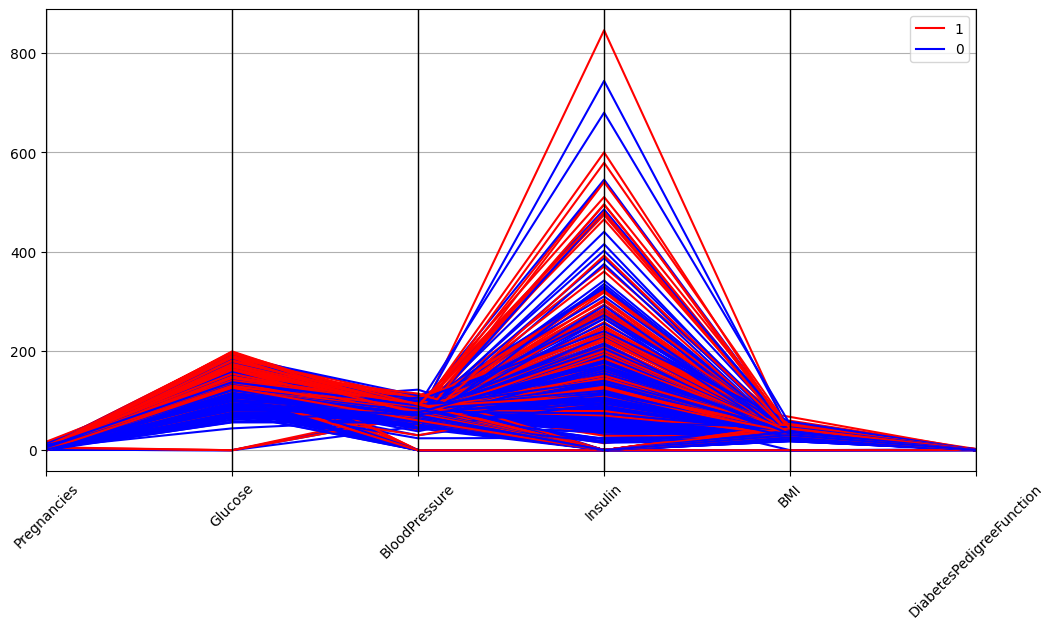

In [63]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

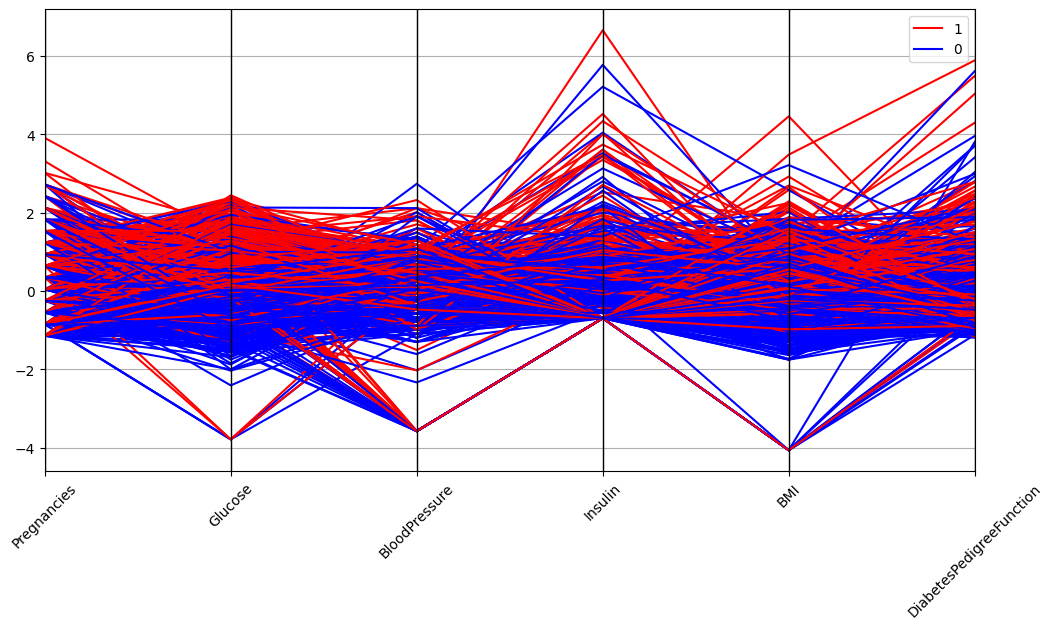

In [64]:
data_sc = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['Outcome'], axis=1)), columns=df.columns[:-1])
data_sc['Outcome'] = df.Outcome
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df.Outcome, test_size=0.2, random_state=42)

In [66]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [67]:
complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
simple_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, max_features=X_train.shape[1]//2, random_state=42).fit(X_train, y_train)

y_pred_train_complex = complex_tree.predict(X_train)
y_pred_test_complex = complex_tree.predict(X_test)

y_pred_train_simple = simple_tree.predict(X_train)
y_pred_test_simple = simple_tree.predict(X_test)

In [68]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])
    return metrics_df

In [69]:
get_metrics(y_train, y_test, y_pred_train_complex, y_pred_test_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.681818,0.581197,0.667677,0.548387,0.618182,0.717172
Diferencia,0.318182,0.418803,0.332323,0.451613,0.381818,0.282828


In [70]:
get_metrics(y_train, y_test, y_pred_train_simple, y_pred_test_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.705212,0.332103,0.589424,0.775862,0.211268,0.967581
Test,0.707792,0.400000,0.611111,0.750000,0.272727,0.949495
Diferencia,-0.002580,-0.067897,-0.021687,0.025862,-0.061460,0.018086


In [71]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.4583333333333333, 0.875, 'BMI <= 29.65\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = M'),
 Text(0.25, 0.625, 'Glucose <= 145.5\ngini = 0.248\nsamples = 228\nvalue = [195, 33]\nclass = M'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'Pregnancies <= 2.5\ngini = 0.176\nsamples = 205\nvalue = [185, 20]\nclass = M'),
 Text(0.08333333333333333, 0.125, 'gini = 0.054\nsamples = 108\nvalue = [105, 3]\nclass = M'),
 Text(0.25, 0.125, 'gini = 0.289\nsamples = 97\nvalue = [80, 17]\nclass = M'),
 Text(0.3333333333333333, 0.375, 'gini = 0.491\nsamples = 23\nvalue = [10.0, 13.0]\nclass = B'),
 Text(0.6666666666666666, 0.625, 'Pregnancies <= 6.5\ngini = 0.498\nsamples = 386\nvalue = [206, 180]\nclass = M'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'Insulin <= 16.0\ngini = 0.484\nsamples = 297\nvalue = [175, 122]\nclass = M'),
 Text(0.4166666666666667, 0.125, 'gini = 0.5\nsamples = 124\nvalue = [62, 62]\nclass = M'),
 Text(0.58333333333333

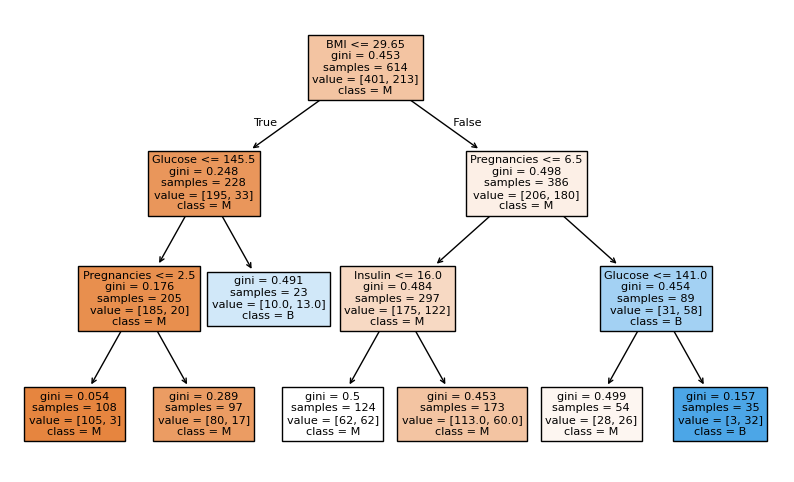

In [72]:
plt.figure(figsize=(10,6))
plot_tree(simple_tree, feature_names=list(X_train.columns), class_names=['M', 'B'], filled=True)

In [73]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [74]:
accuracy_score(y_test, y_pred)

0.6818181818181818

3.OPTIMIZAR EL MODELO ANTERIOR 

In [75]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [76]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [77]:
accuracy_score(y_test, y_pred)

0.6818181818181818

In [78]:
dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))